# matplotlib可视化练习

In [11]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
mpl.rc('figure',figsize=(12,9))
mpl.rc('font',size=15)
mpl.rc('axes.spines',top=False, right=False)

## 练习1：航班乘客变化分析
* 分析年度乘客总量变化情况（折线图）
* 分析乘客在一年中各月份的分布（柱状图）

In [3]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
data.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [6]:
data.shape

(144, 3)

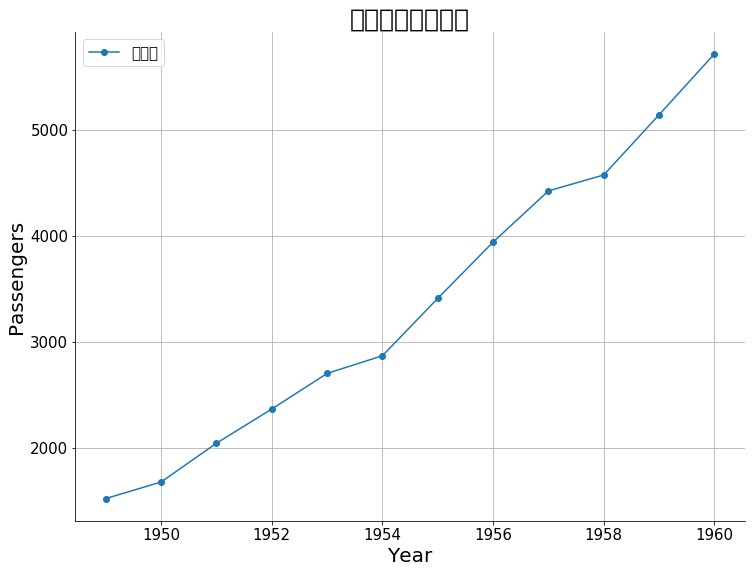

In [7]:
per_year_sum = data.groupby('year').sum()
_,axe = plt.subplots()
plt.rcParams['figure.figsize']=(10,6)
plt.plot(per_year_sum.index, per_year_sum['passengers'].values, marker='o', label=u"乘客数")
plt.grid(True)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Passengers',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(u'年度乘客总量变化',fontsize=25)
axe.spines['top'].set_color(None)
axe.spines['right'].set_color(None)
plt.legend(loc='best')

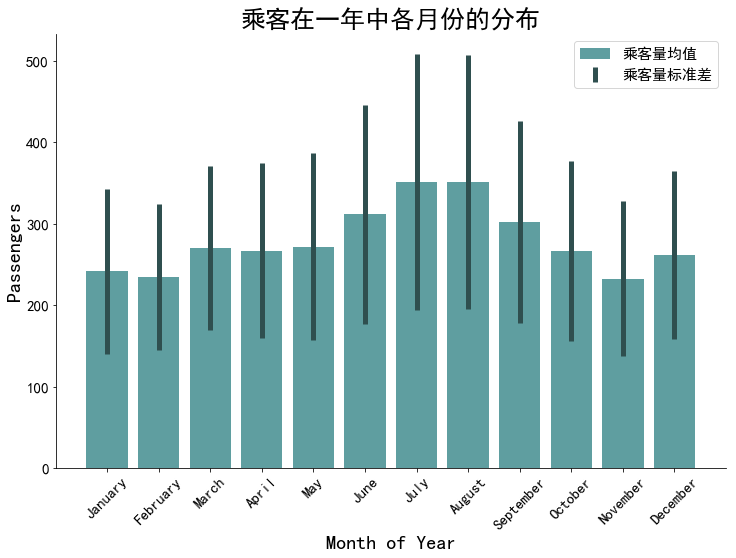

In [17]:
per_month_distribute = data.groupby('month').agg([np.mean, np.std])['passengers']
_,axe=plt.subplots()
plt.rcParams["figure.figsize"] = (12,8)
plt.bar(range(12), per_month_distribute['mean'],color='cadetblue',label='average')
plt.errorbar(range(12), per_month_distribute['mean'],yerr=per_month_distribute['std'],ls='none',color='darkslategray', lw=5, label='error')
plt.xticks(range(12),per_month_distribute.index,fontsize=15,rotation=45)
plt.xlabel('Month of Year',fontsize=20)
plt.ylabel('Passengers',fontsize=20)

plt.legend([u"乘客量均值", u"乘客量标准差"],fontsize=15)
plt.title(u'乘客在一年中各月份的分布',fontsize=25)
axe.spines['top'].set_color(None)
axe.spines['right'].set_color(None)


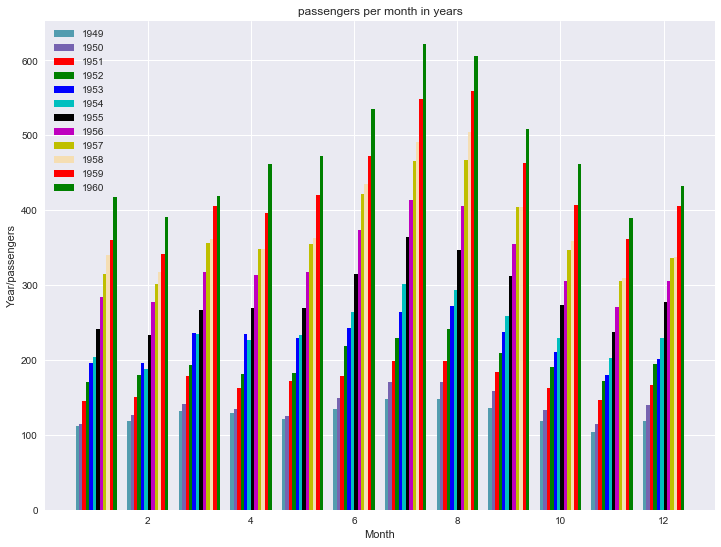

In [9]:
# month/year and passengers
import numpy as np
# 绘制分组柱状图的函数
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2-ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')


group_by_month_year = data.groupby(["year","month"]).agg({"passengers":"sum"}).reset_index()
year_value = data.groupby("year").mean().index.values
month_x =  data.groupby("month").mean().index.values
y_data = []
for t_year in year_value:
    y_data.append(group_by_month_year[group_by_month_year["year"].isin([t_year])]["passengers"])
    
#调用绘图函数
groupedbarplot(x_data = [1,2,3,4,5,6,7,8,9,10,11,12]
               , y_data_list = y_data
               , y_data_names = year_value
               , colors = ['#539caf', '#7663b0','r','g','b','c','k','m','y','wheat','r','g','c']
               , x_label = 'Month'
               , y_label = 'Year/passengers'
               , title = 'passengers per month in years')
